In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [2]:
!pip install gensim

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Deep Learning/train.csv')

In [5]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [6]:
df.shape

(404290, 6)

In [7]:
df.isna().sum()

,0
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404287 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404287 non-null  int64 
 1   qid1          404287 non-null  int64 
 2   qid2          404287 non-null  int64 
 3   question1     404287 non-null  object
 4   question2     404287 non-null  object
 5   is_duplicate  404287 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 21.6+ MB


In [11]:
df.duplicated().sum()

0

In [12]:
df.drop(columns=['id', 'qid1', 'qid2'], inplace=True)

is_duplicate
0    255024
1    149263
Name: count, dtype: int64
is_duplicate
0    63.079941
1    36.920059
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

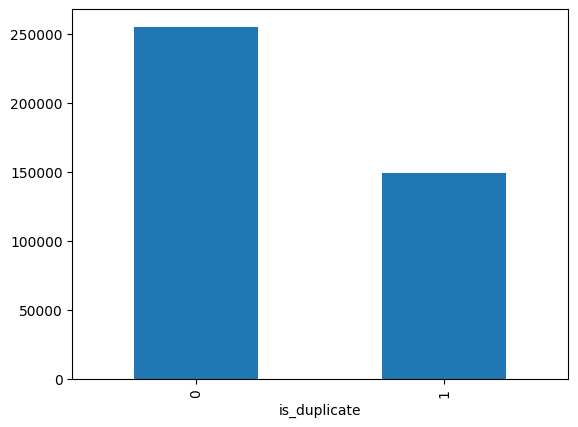

In [13]:
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [14]:
df.head()

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [16]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
stop_words = set(stopwords.words('english'))
len(stop_words)

198

In [18]:
def preprocess(q):

  q = q.strip().lower()
  q = BeautifulSoup(q, 'html.parser').get_text()
  q = re.sub(r'http\S+|www\.\S+', '', q)
  q = ''.join(char for char in q if char not in string.punctuation)

  stop_words = set(stopwords.words('english'))
  q = " ".join([item for item in q.split() if item not in stop_words])

  ps = PorterStemmer()
  q = " ".join([ps.stem(word) for word in q.split()])

  return q


In [21]:
df['question1'] = df['question1'].apply(preprocess)
df['question2'] = df['question2'].apply(preprocess)

In [22]:
df.head()

,question1,question2,is_duplicate
0,step step guid invest share market india,step step guid invest share market,0
1,stori kohinoor kohinoor diamond,would happen indian govern stole kohinoor kohi...,0
2,increas speed internet connect use vpn,internet speed increas hack dn,0
3,mental lone solv,find remaind math2324math divid 2423,0
4,one dissolv water quikli sugar salt methan car...,fish would surviv salt water,0


In [23]:
df.shape

(404287, 3)

In [24]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [27]:
from nltk.tokenize import word_tokenize

combined = pd.concat([df['question1'], df['question2']], ignore_index=True)

sentences = list(combined.apply(lambda x: word_tokenize(x)))

In [28]:
sentences

[['step', 'step', 'guid', 'invest', 'share', 'market', 'india'],
 ['stori', 'kohinoor', 'kohinoor', 'diamond'],
 ['increas', 'speed', 'internet', 'connect', 'use', 'vpn'],
 ['mental', 'lone', 'solv'],
 ['one',
  'dissolv',
  'water',
  'quikli',
  'sugar',
  'salt',
  'methan',
  'carbon',
  'di',
  'oxid'],
 ['astrolog', 'capricorn', 'sun', 'cap', 'moon', 'cap', 'risingwhat', 'say'],
 ['buy', 'tiago'],
 ['good', 'geologist'],
 ['use', 'シ', 'instead', 'し'],
 ['motorola', 'compani', 'hack', 'charter', 'motorolla', 'dcx3400'],
 ['method', 'find', 'separ', 'slit', 'use', 'fresnel', 'biprism'],
 ['read', 'find', 'youtub', 'comment'],
 ['make', 'physic', 'easi', 'learn'],
 ['first', 'sexual', 'experi', 'like'],
 ['law',
  'chang',
  'statu',
  'student',
  'visa',
  'green',
  'card',
  'us',
  'compar',
  'immigr',
  'law',
  'canada'],
 ['would',
  'trump',
  'presid',
  'mean',
  'current',
  'intern',
  'master',
  '’',
  'student',
  'f1',
  'visa'],
 ['manipul', 'mean'],
 ['girl', 'wa

In [29]:
from gensim.models import Word2Vec

model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

In [30]:
word_vectors = model.wv

In [31]:
word_vectors.vectors.shape

(44259, 100)

In [33]:
model.corpus_count

808574

In [34]:
model.wv['straight']

array([-0.18896013,  1.6218426 ,  0.79107064, -1.443005  , -0.60240066,
        1.1426747 ,  0.98954505,  0.12325092, -0.9025179 ,  1.1808449 ,
        0.7139339 ,  0.12187417, -0.21817172, -0.02170796, -0.7836056 ,
       -0.8981213 , -0.06734934,  0.42566794, -0.9243457 ,  0.8166167 ,
        0.7687651 ,  0.7974448 ,  0.28904513,  0.65470374, -0.20898908,
       -1.2456739 , -1.1598277 , -0.72290266,  0.19114245, -0.456657  ,
        0.39634666,  0.19384898, -0.49197713, -1.4287094 ,  0.7699244 ,
       -1.4915154 ,  0.7373226 , -0.28146774, -0.7766052 ,  0.67749685,
       -0.90612537,  0.20506056,  1.5341456 ,  0.5475332 , -0.7327987 ,
        1.1859019 , -0.51149774, -0.07554437, -0.15703058,  0.09063269,
        0.33245814,  0.29064354,  0.43710956, -0.74618155, -0.32703286,
       -0.5945276 ,  0.73913616, -0.064116  ,  0.69178784, -0.70928997,
       -0.12250891,  0.03083112,  0.49060988,  0.6096557 , -0.86570287,
        0.4404985 , -0.0202808 ,  0.07433416, -0.22538197, -0.20

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Tokenize
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['question1'] + df['question2'])  # use both columns

vocab_size = len(tokenizer.word_index) + 1  # +1 for padding token

In [37]:
print(df['question1'].apply(lambda x: len(x.split())).max())
print(df['question2'].apply(lambda x: len(x.split())).max())

54
107


In [38]:
vocab_size

299893

In [ ]:
# Convert to sequences
q1_seq = tokenizer.texts_to_sequences(df['question1'])
q2_seq = tokenizer.texts_to_sequences(df['question2'])

In [ ]:
# Pad sequences 
max_len = 30
q1_pad = pad_sequences(q1_seq, maxlen=max_len, padding='post')
q2_pad = pad_sequences(q2_seq, maxlen=max_len, padding='post')

In [41]:
q2_pad.shape

(404287, 30)

In [ ]:
# Embedding matrix from Word2Vec
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in model.wv:
        embedding_matrix[i] = model.wv[word]


In [43]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.46546018, -0.02011849, -0.14885187, ..., -0.63280284,
        -1.07584178,  1.70306134],
       [ 2.16563988,  0.95830166,  2.42329621, ...,  0.71807861,
        -0.14743438, -0.76952994],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [44]:
embedding_matrix.shape

(299893, 100)

In [47]:
y = df['is_duplicate'].values

In [48]:
y.shape

(404287,)

In [ ]:
from sklearn.model_selection import train_test_split

q1_train, q1_test, q2_train, q2_test, y_train, y_test = train_test_split(
    q1_pad, q2_pad, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [50]:
q1_train.shape

(323429, 30)

In [51]:
y_train.shape

(323429,)

In [52]:
q1_train[0]

array([ 1184, 57921,   786,   186,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0], dtype=int32)

# Model

In [89]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, concatenate, GRU
from tensorflow.keras.models import Model

# Inputs
input1 = Input(shape=(max_len,))
input2 = Input(shape=(max_len,))

# Shared embedding
embedding_layer = Embedding(
    input_dim=vocab_size,          # Size of your vocabulary
    output_dim=embedding_dim,      # Should match word2vec vector size
    weights=[embedding_matrix],    # Pre-trained embeddings
    input_length=max_len,       # Max sequence length
    trainable=False                # Keep it fixed or True to fine-tune
)

encoded1 = embedding_layer(input1)
encoded2 = embedding_layer(input2)

# Shared LSTM
lstm = LSTM(64)
out1 = lstm(encoded1)
out2 = lstm(encoded2)

# Merge
merged = concatenate([out1, out2])
output = Dense(1, activation='sigmoid')(merged)

model = Model(inputs=[input1, input2], outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_20      │ (None, 30)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_21      │ (None, 30)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_10        │ (None, 30, 100)   │ 29,989,300 │ input_layer_20[0… │
│ (Embedding)         │                   │            │ input_layer_21[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_15 (LSTM)      │ (None, 64)        │     42,240 │ embedding_10[0][… │
│                     │                   │            │ embedding_10[1][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_10      │ (None, 128)       │          0 │ lstm_15[0][0],    │
│ (Concatenate)       │                   │            │ lstm_15[1][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 1)         │        129 │ concatenate_10[0… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 30,031,669 (114.56 MB)

 Trainable params: 42,369 (165.50 KB)

 Non-trainable params: 29,989,300 (114.40 MB)

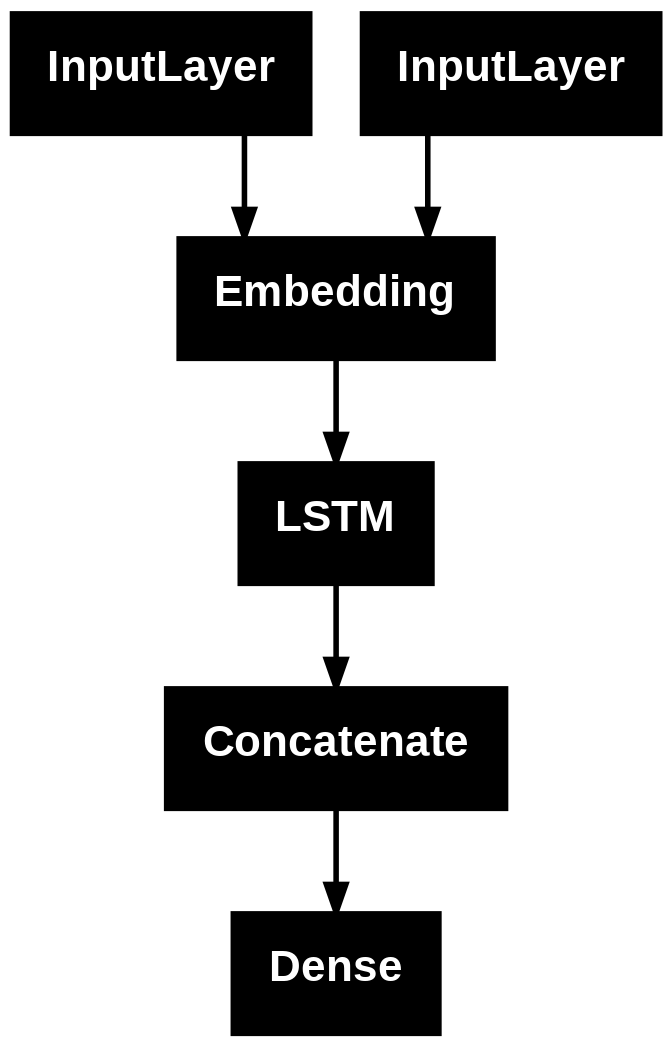

In [90]:
from keras.utils import plot_model
plot_model(model)

In [91]:
history = model.fit(
      [q1_train, q2_train],
      y_train,
      batch_size=128,
      epochs=15,
      validation_data=([q1_test, q2_test], y_test)
)

Epoch 1/15
2527/2527 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.7181 - loss: 0.5602 - val_accuracy: 0.7466 - val_loss: 0.5166
Epoch 2/15
2527/2527 ━━━━━━━━━━━━━━━━━━━━ 42s 9ms/step - accuracy: 0.7536 - loss: 0.5097 - val_accuracy: 0.7551 - val_loss: 0.5061
Epoch 3/15
2527/2527 ━━━━━━━━━━━━━━━━━━━━ 39s 9ms/step - accuracy: 0.7641 - loss: 0.4937 - val_accuracy: 0.7587 - val_loss: 0.5016
Epoch 4/15
2527/2527 ━━━━━━━━━━━━━━━━━━━━ 44s 10ms/step - accuracy: 0.7720 - loss: 0.4809 - val_accuracy: 0.7647 - val_loss: 0.4917
Epoch 5/15
2527/2527 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.7787 - loss: 0.4715 - val_accuracy: 0.7691 - val_loss: 0.4884
Epoch 6/15
2527/2527 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.7844 - loss: 0.4612 - val_accuracy: 0.7686 - val_loss: 0.4872
Epoch 7/15
2527/2527 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 0.7887 - loss: 0.4539 - val_accuracy: 0.7731 - val_loss: 0.4847
Epoch 8/15
2527/2527 ━━━━━━━━━━━━━━━━━━━━ 39s 9ms/step - accuracy: 0.7942 - loss:

In [92]:
test_loss, test_acc = model.evaluate([q1_test, q2_test], y_test)
print(f'Test Accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')

2527/2527 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7760 - loss: 0.4941
Test Accuracy: 0.7756
Test loss: 0.4927


In [93]:
train_loss, train_acc = model.evaluate([q1_train, q2_train], y_train)
print(f'Train Accuracy: {train_acc:.4f}')
print(f'Train Loss: {train_loss:.4f}')

10108/10108 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - accuracy: 0.8215 - loss: 0.3976
Train Accuracy: 0.8216
Train Loss: 0.3980
